In [9]:
# import statements
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
## Runge-Kutta function approximation 
## input:  dt = time step (float)
##         t_final = final time, from which number of steps is calculated (float)
##         g = function of x and t that the first order derivative is equal to, aka dx/dt = g(x,t) (method)
##         x0 = initial value of x (float)
##         t0 = initial value of t, default to 0.0 (float)
## output: t_list: list of time values where function was approximated (numpy array)
##         x_list: list of x approximations for each t value in t_list (numpy array)

def rk4_approx(dt, t_final, g, x0, t0=0.0):
    
    #create lists to contain approximations
    x_list = []
    t_list = []
    
    # number of time steps
    n  = int(t_final/dt) 
    
    #Approximation loop that continuously updates x and t values according to 
    #rk approximation. Tracks each update in master lists that the function returns.
    for i in range(n):
        if i == 0.0:
            x = x0
            t = t0
            
        else:
            k1 = dt*g(x,t)
            k2 = dt*g(x+k1/2,t+dt/2)
            k3 = dt*g(x+k2/2,t+dt/2)
            k4 = dt*g(x+k3,t+dt)
            
            x = x + (k1 + 2*k2 + 2*k3 + k4)/6
            t = t + dt
            
        x_list.append(x)
        t_list.append(t)
        
    x_list = np.array(x_list)
    t_list = np.array(t_list)
    
    return t_list,x_list




    

# Problem 1.
## a. ODE
By Kirchhoff's Law, the voltage in must equal the voltage out:
<br>
$V_{in} = V_R + V_{out}$ 
<br>
$V_R = IR = RC\frac{dV_{out}}{dt}$
<br>
$V_{in} = RC\frac{dV_{out}}{dt} + V_{out}$
<br>
Solving for the first derivative of $V_{out}$, we get:
<br>
$\frac{dV_{out}}{dt} = \frac{V_{in} - V_{out}}{RC}$



### Exact Solution


Solving this ODE involves finding a characteristic solution to 
<br>
$\frac{dV_{out}}{dt} + \frac{V_{out}}{RC} = 0$ 
<br>
and adding it to the particular solution of 
<br>
$\frac{dV_{out}}{dt} + \frac{V_{out}}{RC} = \frac{V_{in}}{RC}$.
<br>
<br>
For the characteristic equation, we assume an ansatz of 
<br>
$V_{out} = Ae^{\alpha t}$
<br>
and solve for $\alpha$ using the characteristic ODE. This produces:
<br>
$V_{out,c}(t) = V_0e^{\frac{-t}{RC}}$
<br>
where we recognize the constant A as the out-voltage at time 0 for the characteristic equation.
<br>
<br>
For the particular solution, we try an ansatz similar to the particular solution:
<br>
$V_{out,p} = V_{in}$
<br>
This successfully solves the particular equation.
<br>
<br>
The general solution is given by:
<br>
$V_{out} = V_{out,c} + V_{out,p} = V_0e^{\frac{-t}{RC}} + V_{in}$
<br>
<br>
This exact solution will be used to test our approximation methods.



## b. Approximations

In [11]:
## exact solution
## input:  t = times to sample Vout (array)
##         RC = resistance times capacitance of circuit (float)
##         V0 = constant of particular solution (float)
##         Vin = voltage applied to circuit (float)
## output: exact solution of ODE (array)

def voltage_exact(t,RC,V0,Vin):
    
    return V0*np.exp(-1*t/RC)+Vin

In [12]:
## naive way of measuring error between functions
## input:  x_exact = exact values (array)
##         x_approx = approximated values (array)
## output: mean absolute error between corresponding points
def mean_absolute_error(t_approx,x_approx,exact,RC,V0,Vin):
    x_exact = exact(t_approx,RC,V0,Vin)
        
    return np.mean(np.abs(x_exact-x_approx))

In [13]:
#set time and constants
t0 = 0
tf = 10.0
dt = .01
t = np.linspace(t0,tf,1000)

Vin = 10
V0 = -Vin
V_init = Vin + V0 

In [14]:
## epedited way to test our
def test_ode_solver(RC):
    #get exact solution for V
    V_exact = voltage_exact(t,RC,V0,Vin)
    
    #define first derivative function
    def ode(V,t,Vin=Vin,RC=RC):
        return (Vin - V)/RC

    #get approximate solution for V
    t_approx,V_approx = rk4_approx(dt,tf,ode,V_init)
    
    #plot results
    plt.plot(t,V_exact,'r',linewidth=7,label='Exact Solution')
    plt.plot(t_approx,V_approx,'bo',markersize=3,label='Approximation')
    plt.xlabel('Time')
    plt.ylabel('Voltage Out')
    plt.title('V vs. T, RC = ' + str(RC))
    plt.legend()
    
    print('Mean absolute error for RC = ' + str(RC) + ': ' + str(mean_absolute_error(t_approx,V_approx,voltage_exact,RC,V0,Vin)))
    

Mean absolute error for RC = 0.01: 0.000180232931307


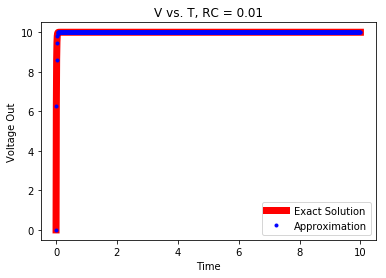

In [15]:
test_ode_solver(RC = 0.01)

Mean absolute error for RC = 0.1: 9.05089083386e-08


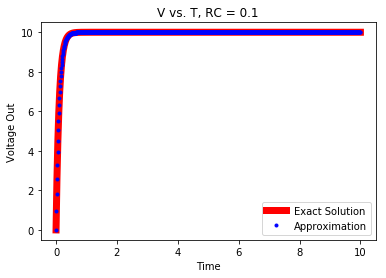

In [16]:
test_ode_solver(RC = 0.1)

Mean absolute error for RC = 1: 8.39854624596e-11


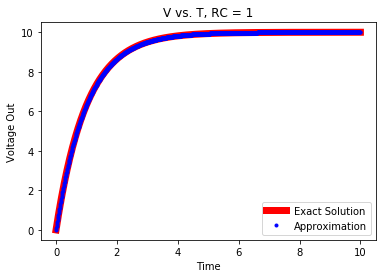

In [17]:
test_ode_solver(RC = 1)

## c. Physical Interpretation

The voltage difference between 'in' and 'out' exponentially approaches 0. The RC value determines the steepness of that approach, with smaller RC values giving a steeper approach to its limit and larger RC values smoothing out the function. As we increase the resistance, the circuit takes longer to balance out the voltages. The resistance and capacitance work to prevent charge from moving freely, thereby maintaining a voltage difference for longer. Thus, increasing either R or C slows down the capacitor charging up. 

# Problem 2

## a. Exact Solution

Using the same methods as above:
<br> 
$N_A = N_{A,0}e^{\frac{-t}{\tau_A}}$
<br>
<br>
$N_B = N_{A,0}\frac{\tau_B}{\tau_A-\tau_B}e^{\frac{-t}{\tau_A}}$

In [72]:
#################### do rest of problem

In [73]:
#####################

In [74]:
###################

In [75]:
#################

# Problem 4

## a. Exact Solution

$N(t) = \frac{a}{Ce^{-at}+b}$

We notice the solution becomes $Cae^{-at}$, which is the solution to the simpler differential equation $\frac{dN}{dt}=aN$.

## b. Approximations

In [59]:
def population_exact(t,a,N0,b):
    C = a/N0 - b
    return a/(C*np.exp(-1*a*t)+b)

def pop_test_ode_solver(a,N0,b):
    
    def N_ode(N,t,a=a,b=b):
    
        return a*N - b*N**2
    
    dt = 0.001
    t0 = 0.0
    tf = 10
    t = np.linspace(t0,tf,10000)
    
    C = a/N0 - b 
    N_exact = population_exact(t,a,N0,b)
    
    t_approx,N_approx = rk4_approx(dt,tf,N_ode,N0)
    
    #plot results
    plt.plot(t,N_exact,'r',linewidth=7,label='Exact Solution')
    plt.plot(t_approx,N_approx,'bo',markersize=3,label='Approximation')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('N vs. T, a = ' + str(a) +', b = '+str(b) +', and N(0) = '+str(N0))
    plt.legend()
    
    print('Mean absolute error for a = ' + str(a) +', b = '+str(b) +', and N(0) = '+str(N0) + ': ' + str(mean_absolute_error(t_approx,N_approx,population_exact,a,N0,b)))
    
    

Mean absolute error for a = 2, b = 0, and N(0) = 100: 0.00693428675908


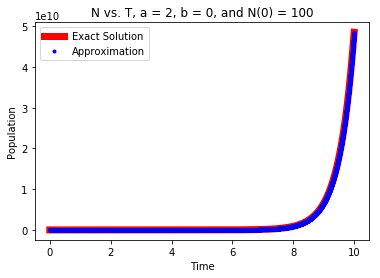

In [60]:
pop_test_ode_solver(2,100,0)

Mean absolute error for a = 1, b = 0, and N(0) = 10: 9.04656376122e-09


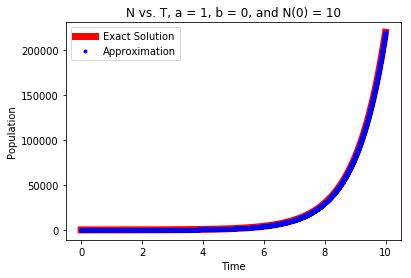

In [61]:
pop_test_ode_solver(1,10,0)

Mean absolute error for a = 3.5, b = 0, and N(0) = 25: 48161.3109544


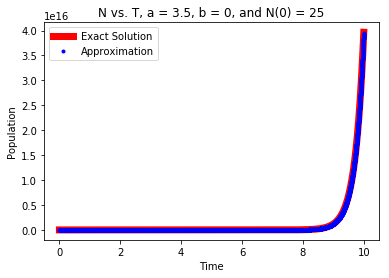

In [62]:
pop_test_ode_solver(3.5,25,0)

Now we try non-zero values of b.

Mean absolute error for a = 10, b = 3, and N(0) = 1: 7.13653869333e-13


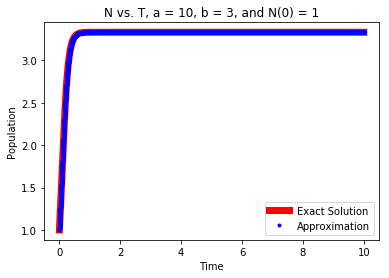

In [63]:
pop_test_ode_solver(10,1,3)

Mean absolute error for a = 12, b = 0.01, and N(0) = 1000: 2.15573174955e-10


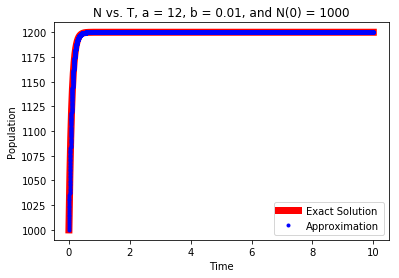

In [68]:
pop_test_ode_solver(12,1000,.01)

Mean absolute error for a = 12, b = 0.01, and N(0) = 1300: 1.78860227606e-10


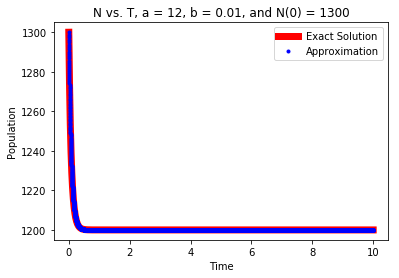

In [69]:
pop_test_ode_solver(12,1300,.01)

As t goes to infinity, the population approaches a limit of a/b. Without the death rate, b, the population exponentially increases. With b there to curtail population growth, the population meets a ceiling, similar to a sigmoid function. The $N^2$ term is important as it shows how population will reach limiting factors such as supply shortages (food, shelter, etc) if the population gets too large. 